In [108]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
#train=pd.read_csv("1.csv",parse_dates=[['tr_date','tr_time']])
df=pd.read_csv("1.csv")
# 读取数据，pd.read_csv默认生成DataFrame对象，需将其转换成Series对象
# df = pd.read_csv('./1.csv', encoding='utf-8')
df['new_date']=df['tr_date']+' '+df['tr_time']
res=[]
df['new_date']=df['new_date'].replace('-','/')
for i in df['new_date']:
    if i[0]=='0':
        res.append('2'+i)
    else:
        res.append(i)

#print(df['tr_date'])
df['newer_date'] = pd.to_datetime(res,format='%Y/%m/%d %H:%M:%S')  # 将字符串索引转换成时间索引
# df.index=df['tr_date']
# ts1 = df['upgb']  # 生成pd.Series对象
# ts1.head()
# ts2=df['downgb']
# ts2.head()

DataFrame中存在重复的行或者几行中某几列的值重复，这时候需要去掉重复行，示例如下：

data.drop_duplicates(subset=['A','B'],keep='first',inplace=True)

代码中subset对应的值是列名，表示只考虑这两列，将这两列对应值相同的行进行去重。默认值为subset=None表示考虑所有列。

keep='first'表示保留第一次出现的重复行，是默认值。keep另外两个取值为"last"和False，分别表示保留最后一次出现的重复行和去除所有重复行。

inplace=True表示直接在原来的DataFrame上删除重复项，而默认值False表示生成一个副本。

In [109]:
print(df)

       tr_date  tr_time      upgb    downgb           new_date  \
0     2018/3/1  0:00:00  0.324710  3.560744   2018/3/1 0:00:00   
1     2018/3/1  1:00:00  0.070474  1.154026   2018/3/1 1:00:00   
2     2018/3/1  2:00:00  0.065063  0.571824   2018/3/1 2:00:00   
3     2018/3/1  3:00:00  0.032563  0.435221   2018/3/1 3:00:00   
4     2018/3/1  4:00:00  0.030587  0.099965   2018/3/1 4:00:00   
..         ...      ...       ...       ...                ...   
821  018-04-04  14:00:0  0.170122  0.181608  018-04-04 14:00:0   
822  018-04-04  15:00:0  0.242074  0.725839  018-04-04 15:00:0   
823  018-04-04  16:00:0  0.240045  0.576050  018-04-04 16:00:0   
824  018-04-04  17:00:0  0.368557  0.023902  018-04-04 17:00:0   
825  018-04-04  18:00:0  0.220290  0.797662  018-04-04 18:00:0   

             newer_date  
0   2018-03-01 00:00:00  
1   2018-03-01 01:00:00  
2   2018-03-01 02:00:00  
3   2018-03-01 03:00:00  
4   2018-03-01 04:00:00  
..                  ...  
821 2018-04-04 14:00:00  

In [127]:
#df.index=df['newer_date']
#df = df.set_index('newer_date').asfreq('H')
df.index = pd.date_range(start = '2018/3/1 00:00:00',periods=826, freq='H')
print(df.index)

DatetimeIndex(['2018-03-01 00:00:00', '2018-03-01 01:00:00',
               '2018-03-01 02:00:00', '2018-03-01 03:00:00',
               '2018-03-01 04:00:00', '2018-03-01 05:00:00',
               '2018-03-01 06:00:00', '2018-03-01 07:00:00',
               '2018-03-01 08:00:00', '2018-03-01 09:00:00',
               ...
               '2018-04-04 00:00:00', '2018-04-04 01:00:00',
               '2018-04-04 02:00:00', '2018-04-04 03:00:00',
               '2018-04-04 04:00:00', '2018-04-04 05:00:00',
               '2018-04-04 06:00:00', '2018-04-04 07:00:00',
               '2018-04-04 08:00:00', '2018-04-04 09:00:00'],
              dtype='datetime64[ns]', length=826, freq='H')


In [156]:
#train.index = pd.to_datetime(train['tr_date'],format='%Y/%m/%d %H:%M:%S')# 将字符串索引转换成时间索引
#train.index=train.tr_date_tr_time
ts1 = df['upgb']  # 生成pd.Series对象
print(ts1)

2018-03-01 00:00:00    0.324710
2018-03-01 01:00:00    0.070474
2018-03-01 02:00:00    0.065063
2018-03-01 03:00:00    0.032563
2018-03-01 04:00:00    0.030587
                         ...   
2018-04-04 05:00:00    0.170122
2018-04-04 06:00:00    0.242074
2018-04-04 07:00:00    0.240045
2018-04-04 08:00:00    0.368557
2018-04-04 09:00:00    0.220290
Freq: H, Name: upgb, Length: 826, dtype: float64


In [157]:
print(ts1.index)

DatetimeIndex(['2018-03-01 00:00:00', '2018-03-01 01:00:00',
               '2018-03-01 02:00:00', '2018-03-01 03:00:00',
               '2018-03-01 04:00:00', '2018-03-01 05:00:00',
               '2018-03-01 06:00:00', '2018-03-01 07:00:00',
               '2018-03-01 08:00:00', '2018-03-01 09:00:00',
               ...
               '2018-04-04 00:00:00', '2018-04-04 01:00:00',
               '2018-04-04 02:00:00', '2018-04-04 03:00:00',
               '2018-04-04 04:00:00', '2018-04-04 05:00:00',
               '2018-04-04 06:00:00', '2018-04-04 07:00:00',
               '2018-04-04 08:00:00', '2018-04-04 09:00:00'],
              dtype='datetime64[ns]', length=826, freq='H')


In [158]:
ts2 = df['downgb']  # 生成pd.Series对象
ts2.head()

2018-03-01 00:00:00    3.560744
2018-03-01 01:00:00    1.154026
2018-03-01 02:00:00    0.571824
2018-03-01 03:00:00    0.435221
2018-03-01 04:00:00    0.099965
Freq: H, Name: downgb, dtype: float64

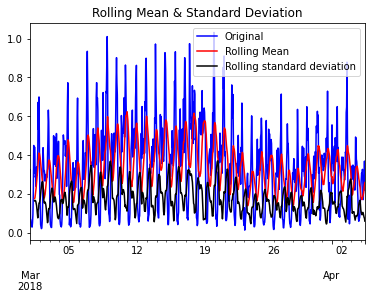

In [159]:
import statsmodels.tsa.stattools as ts
def draw_trend(timeseries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = timeseries.rolling(window=size).mean()
    # 对size个数据移动平均的方差
    rol_std = timeseries.rolling(window=size).std()
 
    timeseries.plot(color='blue', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_std.plot(color='black', label='Rolling standard deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
 
def draw_ts(timeseries):
    f = plt.figure(facecolor='white')
    timeseries.plot(color='blue')
    plt.show()
 
#Dickey-Fuller test:
def teststationarity(ts):
    dftest = adfuller(ts)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput
draw_trend(ts1,12)

In [160]:
# draw_trend(ts,12)

In [161]:
from statsmodels.tsa.stattools import *
teststationarity(ts1)

Test Statistic                  -2.570241
p-value                          0.099305
#Lags Used                      21.000000
Number of Observations Used    804.000000
Critical Value (1%)             -3.438510
Critical Value (5%)             -2.865142
Critical Value (10%)            -2.568688
dtype: float64

In [162]:
ts1_log = np.log(ts1)

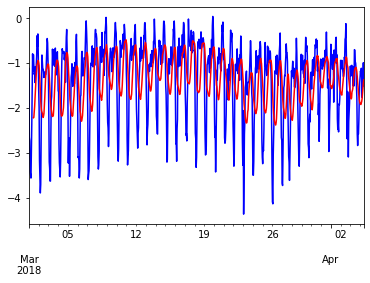

In [163]:
def draw_moving(timeSeries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = timeSeries.rolling(window=size).mean()
    # 对size个数据进行加权移动平均
    rol_weighted_mean = pd.DataFrame.ewm(timeSeries, span=size)
    #rol_weighted_mean=timeSeries.ewm(halflife=size,min_periods=0,adjust=True,ignore_na=False).mean()
 
    timeSeries.plot(color='blue', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
#     rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean')
#     plt.show()
draw_moving(ts1_log,12)

In [164]:
diff_12 = ts1_log.diff(12)
diff_12.dropna(inplace=True)
diff_12_1 = diff_12.diff(1)
diff_12_1.dropna(inplace=True)
teststationarity(diff_12_1)#这里结果并不满足12平稳

Test Statistic                -1.436475e+01
p-value                        9.714767e-27
#Lags Used                     2.100000e+01
Number of Observations Used    7.910000e+02
Critical Value (1%)           -3.438644e+00
Critical Value (5%)           -2.865201e+00
Critical Value (10%)          -2.568719e+00
dtype: float64

In [165]:
#ts1_log.index=pd.to_datetime(ts1_log.index)
print(ts1.index)


DatetimeIndex(['2018-03-01 00:00:00', '2018-03-01 01:00:00',
               '2018-03-01 02:00:00', '2018-03-01 03:00:00',
               '2018-03-01 04:00:00', '2018-03-01 05:00:00',
               '2018-03-01 06:00:00', '2018-03-01 07:00:00',
               '2018-03-01 08:00:00', '2018-03-01 09:00:00',
               ...
               '2018-04-04 00:00:00', '2018-04-04 01:00:00',
               '2018-04-04 02:00:00', '2018-04-04 03:00:00',
               '2018-04-04 04:00:00', '2018-04-04 05:00:00',
               '2018-04-04 06:00:00', '2018-04-04 07:00:00',
               '2018-04-04 08:00:00', '2018-04-04 09:00:00'],
              dtype='datetime64[ns]', length=826, freq='H')


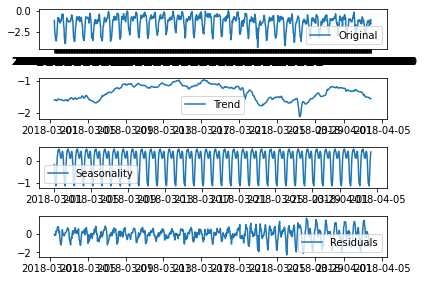

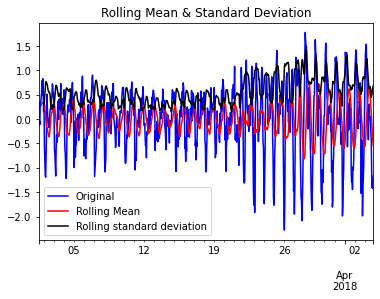

Test Statistic                -1.753371e+01
p-value                        4.223956e-30
#Lags Used                     1.900000e+01
Number of Observations Used    7.820000e+02
Critical Value (1%)           -3.438740e+00
Critical Value (5%)           -2.865243e+00
Critical Value (10%)          -2.568742e+00
dtype: float64

In [166]:

from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(timeseries):
    
    # 返回包含三个部分 trend（趋势部分） ， seasonal（季节性部分） 和residual (残留部分)
    decomposition = seasonal_decompose(timeseries)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    plt.subplot(411)
    plt.plot(ts_log, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    return trend , seasonal, residual
#ts1_log.shift()
trend , seasonal, residual = decompose(ts1_log)
residual.dropna(inplace=True)
draw_trend(residual,12)
teststationarity(residual)

In [167]:

rol_mean = ts1_log.rolling(window=12).mean()
rol_mean.dropna(inplace=True)
ts_diff_1 = rol_mean.diff(1)
ts_diff_1.dropna(inplace=True)
teststationarity(ts_diff_1)

Test Statistic                -1.140064e+01
p-value                        7.663599e-21
#Lags Used                     1.600000e+01
Number of Observations Used    7.970000e+02
Critical Value (1%)           -3.438581e+00
Critical Value (5%)           -2.865173e+00
Critical Value (10%)          -2.568705e+00
dtype: float64

In [168]:
ts_diff_2 = ts_diff_1.diff(1)
ts_diff_2.dropna(inplace=True)
teststationarity(ts_diff_2)

Test Statistic                -1.436475e+01
p-value                        9.714767e-27
#Lags Used                     2.100000e+01
Number of Observations Used    7.910000e+02
Critical Value (1%)           -3.438644e+00
Critical Value (5%)           -2.865201e+00
Critical Value (10%)          -2.568719e+00
dtype: float64

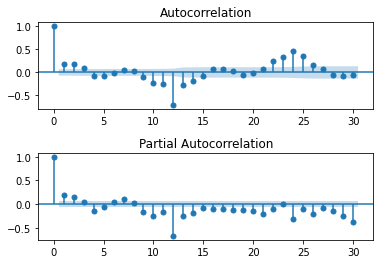

In [169]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def draw_acf_pacf(ts,lags):
    f = plt.figure(facecolor='white')
    ax1 = f.add_subplot(211)
    plot_acf(ts,ax=ax1,lags=lags)
    ax2 = f.add_subplot(212)
    plot_pacf(ts,ax=ax2,lags=lags)
    plt.subplots_adjust(hspace=0.5)
    plt.show()
draw_acf_pacf(ts_diff_2,30)

In [170]:

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_diff_1, order=(1,1,1)) 
result_arima = model.fit( disp=-1, method='css')

d:\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
d:\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated i

In [253]:
predict_ts = result_arima.predict(len(ts1)-5,len(ts1))
# 一阶差分还原
diff_shift_ts = ts_diff_1.shift(1)
diff_recover_1 = predict_ts.add(diff_shift_ts)
# 再次一阶差分还原
rol_shift_ts = rol_mean.shift(1)
diff_recover = diff_recover_1.add(rol_shift_ts)
# 移动平均还原
rol_sum = ts_log.rolling(window=11).sum()
rol_recover = diff_recover*12 - rol_sum.shift(1)
# 对数还原
log_recover = np.exp(rol_recover)
#log_recover.dropna(0,inplace=True)

In [254]:
print(diff_shift_ts)

2018-03-01 12:00:00         NaN
2018-03-01 13:00:00    0.007048
2018-03-01 14:00:00    0.116528
2018-03-01 15:00:00    0.125949
2018-03-01 16:00:00    0.165545
                         ...   
2018-04-04 05:00:00    0.037049
2018-04-04 06:00:00    0.067711
2018-04-04 07:00:00    0.118314
2018-04-04 08:00:00    0.096900
2018-04-04 09:00:00    0.132131
Freq: H, Name: upgb, Length: 814, dtype: float64


In [255]:
print(log_recover.index)


Index([2018-03-01 11:00:00, 2018-03-01 12:00:00, 2018-03-01 13:00:00,
       2018-03-01 14:00:00, 2018-03-01 15:00:00, 2018-03-01 16:00:00,
       2018-03-01 17:00:00, 2018-03-01 18:00:00, 2018-03-01 19:00:00,
       2018-03-01 20:00:00,
       ...
       '2018/3/9 22:00:00', '2018/3/9 23:00:00',  '2018/3/9 2:00:00',
        '2018/3/9 3:00:00',  '2018/3/9 4:00:00',  '2018/3/9 5:00:00',
        '2018/3/9 6:00:00',  '2018/3/9 7:00:00',  '2018/3/9 8:00:00',
        '2018/3/9 9:00:00'],
      dtype='object', length=1641)


In [256]:
print(rol_recover)

2018-03-01 11:00:00   NaN
2018-03-01 12:00:00   NaN
2018-03-01 13:00:00   NaN
2018-03-01 14:00:00   NaN
2018-03-01 15:00:00   NaN
                       ..
2018/3/9 5:00:00      NaN
2018/3/9 6:00:00      NaN
2018/3/9 7:00:00      NaN
2018/3/9 8:00:00      NaN
2018/3/9 9:00:00      NaN
Length: 1641, dtype: float64


In [257]:
print(log_recover)

2018-03-01 11:00:00   NaN
2018-03-01 12:00:00   NaN
2018-03-01 13:00:00   NaN
2018-03-01 14:00:00   NaN
2018-03-01 15:00:00   NaN
                       ..
2018/3/9 5:00:00      NaN
2018/3/9 6:00:00      NaN
2018/3/9 7:00:00      NaN
2018/3/9 8:00:00      NaN
2018/3/9 9:00:00      NaN
Length: 1641, dtype: float64


In [258]:
print(log_recover.index)

Index([2018-03-01 11:00:00, 2018-03-01 12:00:00, 2018-03-01 13:00:00,
       2018-03-01 14:00:00, 2018-03-01 15:00:00, 2018-03-01 16:00:00,
       2018-03-01 17:00:00, 2018-03-01 18:00:00, 2018-03-01 19:00:00,
       2018-03-01 20:00:00,
       ...
       '2018/3/9 22:00:00', '2018/3/9 23:00:00',  '2018/3/9 2:00:00',
        '2018/3/9 3:00:00',  '2018/3/9 4:00:00',  '2018/3/9 5:00:00',
        '2018/3/9 6:00:00',  '2018/3/9 7:00:00',  '2018/3/9 8:00:00',
        '2018/3/9 9:00:00'],
      dtype='object', length=1641)


In [259]:
#print(predict_ts.index)

In [260]:
print(ts1.index)

DatetimeIndex(['2018-03-01 17:00:00', '2018-03-01 18:00:00',
               '2018-03-01 19:00:00', '2018-03-01 20:00:00',
               '2018-03-01 21:00:00', '2018-03-01 22:00:00',
               '2018-03-01 23:00:00', '2018-03-02 00:00:00',
               '2018-03-02 01:00:00', '2018-03-02 02:00:00',
               ...
               '2018-04-01 01:00:00', '2018-04-01 02:00:00',
               '2018-04-01 03:00:00', '2018-04-01 04:00:00',
               '2018-04-01 05:00:00', '2018-04-01 06:00:00',
               '2018-04-01 07:00:00', '2018-04-01 08:00:00',
               '2018-04-01 09:00:00', '2018-04-01 10:00:00'],
              dtype='datetime64[ns]', length=738, freq='H')


In [261]:
ts1 = ts1[log_recover.index]  # 过滤没有预测的记录plt.figure(facecolor='white')
# log_recover.plot(color='blue', label='Predict')
# ts.plot(color='red', label='Original')
# plt.legend(loc='best')
# plt.title('RMSE: %.4f'% np.sqrt(sum((log_recover-ts)**2)/ts.size))
# plt.show()
#df_monthly.index.names=['Year','Month','Week','Day of Week']
# log_recover.index=predict_ts.index
# df['A'] = list(range(len(predict_ts.index)))
# ts1.index=df['A']
# log_cover.index=df['A']
#log_recover = log_recover[predict_ts.index] 
print(('RMSE: %.4f'% np.sqrt(sum((log_recover-ts1)**2)/ts1.size)))

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index([2018-03-01 11:00:00, 2018-03-01 12:00:00, 2018-03-01 13:00:00,\n       2018-03-01 14:00:00, 2018-03-01 15:00:00,\n       ...\n        '2018/3/9 5:00:00',  '2018/3/9 6:00:00',  '2018/3/9 7:00:00',\n        '2018/3/9 8:00:00',  '2018/3/9 9:00:00'],\n      dtype='object', length=903). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [262]:
print(df.columns)

Index(['tr_date', 'tr_time', 'upgb', 'downgb', 'new_date', 'newer_date'], dtype='object')
